#### Question 4

(a)
create two arrays to data
take slug as $x$, elevation as $y$
cal the $\beta_1$ and $\beta_2$ value

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

In [2]:
y = np.array([0.480,0.605,0.530,0.505,0.505,0.625,0.550
          ,0.510,0.570,0.5,0.535])
x = np.array([160,616,1050,130,20,5277,350,63,465,10,566])
x_bar = np.mean(x)
y_bar = np.mean(y)
n = x.shape[0]

Sxx = np.sum(np.square(x)) - n*x_bar*x_bar
Sxy = np.sum(x*y) - n*x_bar*y_bar

beta_1 = Sxy/Sxx
beta_0 = y_bar - beta_1*x_bar

print('beta_0 is ', beta_0)
print('beta_1 is ', beta_1)

beta_0 is  0.5207848203039731
beta_1 is  2.140426974345895e-05


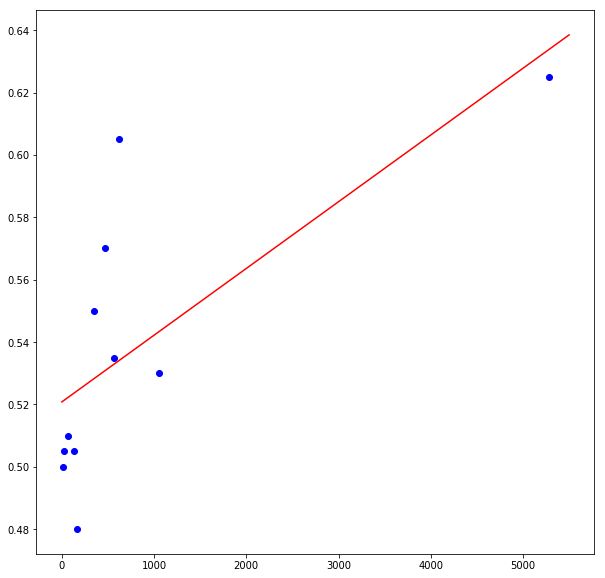

In [3]:
plt.figure(figsize = (10, 10))
# create a point plot
plt.plot(x, y, 'bo')
plt.plot([0, 5500], [beta_1*x + beta_0 for x in [0, 5500]], 'r')
plt.show()

(b) 
test the null hypothesis with T test that the slope $\beta_1 = 0$, and the alternate $\beta_1 \neq 0$

$H_0: \beta_1 = 0$ Null hypothesis

$H_1: \beta_1 \neq 0$ Alternatee hypothesis

In [4]:
SSE = 0
for i in range(len(x)):
    SSE += (y[i] - beta_0 - beta_1*x[i])**2

sigma_est = (SSE / (len(x) - 2))**0.5
SE_b_1 = (sigma_est**2 / Sxx)**0.5
t = (beta_1 - 0) / SE_b_1
print('t is ', t)

t is  3.0195982888864057


By checking the T table, with $df = 11 - 2 = 9, a/2 = 0.005\Rightarrow t_{0.005,9}=3.25$

Because $t<t_{0.005,9}$, fail to the null hypothesis. Conclude that $\beta_1$ is not contributing to $\hat{y}$

(c) draw the least squares line

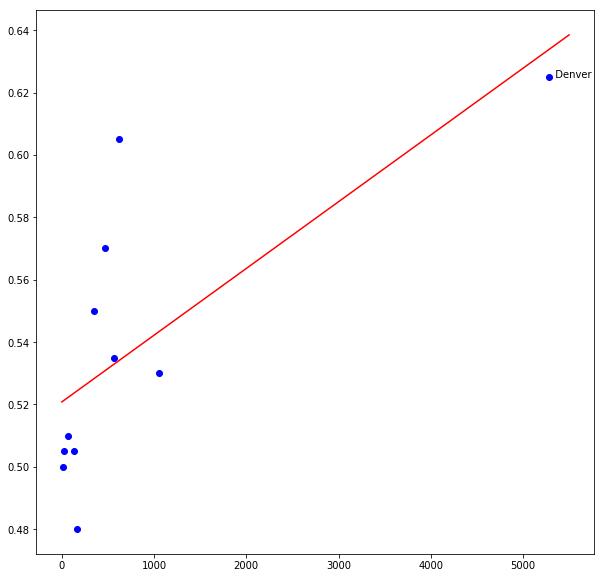

In [5]:
plt.figure(figsize = (10, 10))
# create a point plot
plt.plot(x, y, 'bo')
plt.plot([0, 5500], [beta_1*x + beta_0 for x in [0, 5500]], 'r')
plt.annotate('  Denver', (x[5], y[5]))
plt.show()

I found that the data from Denver has a large shift from other points. It could be a data error and affect the model.

(d) remove Denver

beta_0 is  0.5070435999035114
beta_1 is  6.401282826964629e-05
t is  1.969872195962768


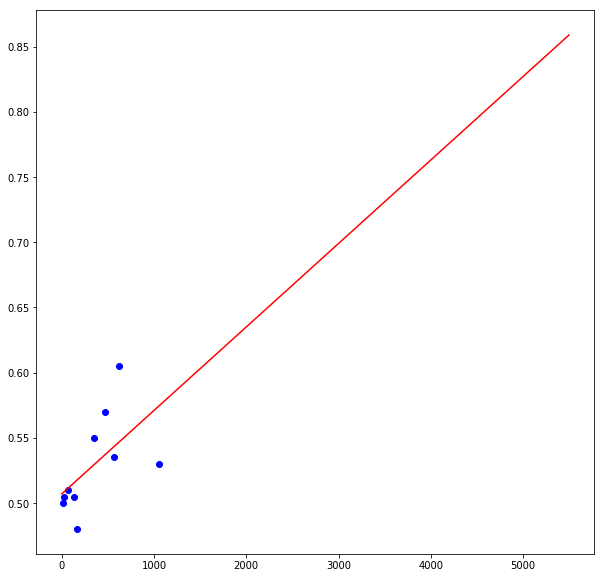

In [6]:
y = np.array([0.480,0.605,0.530,0.505,0.505,0.550
          ,0.510,0.570,0.5,0.535])
x = np.array([160,616,1050,130,20,350,63,465,10,566])
x_bar = np.mean(x)
y_bar = np.mean(y)
n = x.shape[0]

Sxx = np.sum(np.square(x)) - n*x_bar*x_bar
Sxy = np.sum(x*y) - n*x_bar*y_bar

beta_1 = Sxy/Sxx
beta_0 = y_bar - beta_1*x_bar

print('beta_0 is ', beta_0)
print('beta_1 is ', beta_1)
SSE = 0
for i in range(len(x)):
    SSE += (y[i] - beta_0 - beta_1*x[i])**2

sigma_est = (SSE / (len(x) - 2))**0.5
SE_b_1 = (sigma_est**2 / Sxx)**0.5
t = (beta_1 - 0) / SE_b_1
print('t is ', t)
plt.figure(figsize = (10, 10))
# create a point plot
plt.plot(x, y, 'bo')
plt.plot([0, 5500], [beta_1*x + beta_0 for x in [0, 5500]], 'r')
plt.show()

After removing Denver's data, we have $t=1.97<t_{0.005,8}=3.355$. So we still fail to  reject $H_0$ which means that $\beta_1$ is not contributing to $\hat{y}$. The elevation has no effect on slugging percentage.

---

#### Question 5
In general categories situation, we need $n-1$ dummy variables (n is the number of categories -- 3 in this case). In this case, we only have one dummy variable which might conduct to error.
we could have an alternative model $\hat{y}=\beta_0+\beta_1x_1+\beta_2x_2+\beta_3x_3$, notice that $x$ is discrete and only has two values 0 or 1. So the average salary for each level should be $\bar{y_0}=\beta_0, \bar{y_1}=\beta_0+\beta_1, \bar{y_2}=\beta_0+\beta_1+\beta_2, \bar{y_3}=\beta_0+\beta_1+\beta_2+\beta_3$

---
#### Project

In [7]:
file_name = 'BostonHousingData.xlsx'
df = pd.read_excel(file_name)

In [8]:
# show some basic info about the data
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


After observating the data, I found that CHAS is a dummy variable. It will be added in the multiple linear regression

In [9]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS         int64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


After observating the data, there is no need for data wrangling since there is no missing data

In [11]:
# use corr() to find the features that is most correlated with the MEDV
df.corr()['MEDV'].sort_values()

LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
MEDV       1.000000
Name: MEDV, dtype: float64

##### Implement simple linear regression for prediction

In [49]:
# use statsmodels to fit a model
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [50]:
# fit LSTAT with MEDV
model = smf.ols('MEDV ~ LSTAT', data=df)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           5.08e-88
Time:                        01:31:01   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

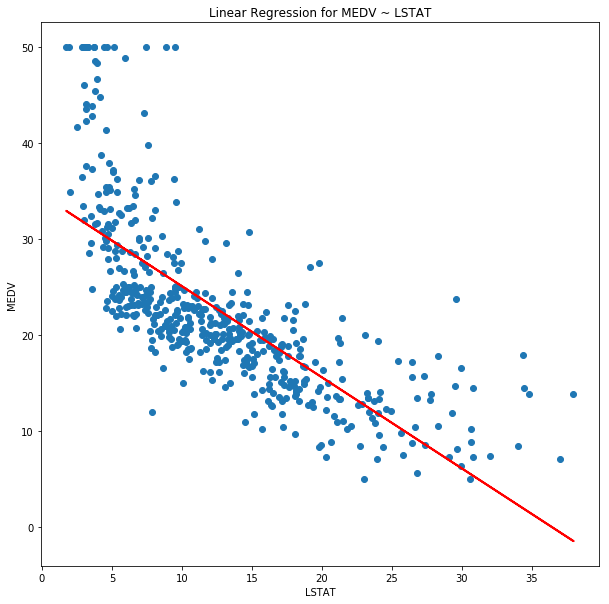

In [51]:
# Predict values
pred = model.predict()
# Plot regression against actual data
plt.figure(figsize=(10,10))
plt.plot(df['LSTAT'], df['MEDV'], 'o')           # scatter plot showing actual data
plt.plot(df['LSTAT'], pred, 'r', linewidth=2)   # regression line
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.title('Linear Regression for MEDV ~ LSTAT')
plt.show()

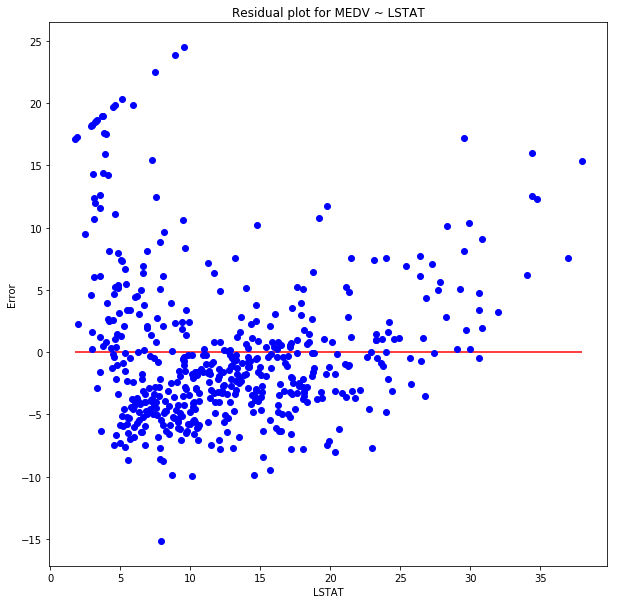

In [52]:
pred = np.array(pred)
Y = np.array(df['MEDV'])
X = np.array(df['LSTAT'])
error = Y - pred
plt.figure(figsize = (10,10))
plt.plot(X, error, 'bo')
plt.hlines(0, min(X), max(X), 'r')
plt.xlabel('LSTAT')
plt.ylabel('Error')
plt.title('Residual plot for MEDV ~ LSTAT')
plt.show()

In [53]:
model.params

Intercept    34.553841
LSTAT        -0.950049
dtype: float64

In [16]:
model = smf.ols('MEDV ~ PTRATIO', data=df)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           1.61e-34
Time:                        00:38:02   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.000      56.393      68.296
PTRATIO       -2.1572      0.163    -13.233      0.000      -2.477      -1.837
==============================================================================
Omnibus:                       92.924   Durbin-Watson:                   0.725
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.444
Skew:                           1.001   Prob(JB):                     2.68e-42
Kurtosis:                       5.252   Cond. No.                         160.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
model = smf.ols('MEDV ~ INDUS', data=df)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     154.0
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           4.90e-31
Time:                        00:38:02   Log-Likelihood:                -1772.8
No. Observations:                 506   AIC:                             3550.
Df Residuals:                     504   BIC:                             3558.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     29.7549      0.683     43.537      0.000      28.412      31.098
INDUS         -0.6485      0.052    -12.408      0.000      -0.751      -0.546
==============================================================================
Omnibus:                      178.432   Durbin-Watson:                   0.676
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              562.993
Skew:                           1.672   Prob(JB):                    5.59e-123
Kurtosis:                       6.939   Cond. No.                         25.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
model = smf.ols('MEDV ~ TAX', data=df)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     141.8
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           5.64e-29
Time:                        00:38:02   Log-Likelihood:                -1777.5
No. Observations:                 506   AIC:                             3559.
Df Residuals:                     504   BIC:                             3568.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.9707      0.948     34.768      0.000      31.108      34.834
TAX           -0.0256      0.002    -11.906      0.000      -0.030      -0.021
==============================================================================
Omnibus:                      172.501   Durbin-Watson:                   0.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.072
Skew:                           1.661   Prob(JB):                    5.17e-108
Kurtosis:                       6.521   Cond. No.                     1.16e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
model = smf.ols('MEDV ~ NOX', data=df)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.183
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     112.6
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           7.07e-24
Time:                        00:38:02   Log-Likelihood:                -1789.2
No. Observations:                 506   AIC:                             3582.
Df Residuals:                     504   BIC:                             3591.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.3459      1.811     22.828      0.000      37.787      44.904
NOX          -33.9161      3.196    -10.611      0.000     -40.196     -27.636
==============================================================================
Omnibus:                      165.520   Durbin-Watson:                   0.643
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              430.900
Skew:                           1.641   Prob(JB):                     2.70e-94
Kurtosis:                       6.109   Cond. No.                         11.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
model = smf.ols('MEDV ~ CRIM', data=df)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           1.17e-19
Time:                        00:38:02   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.0331      0.409     58.740      0.000      23.229      24.837
CRIM          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
model = smf.ols('MEDV ~ RAD', data=df)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.144
Method:                 Least Squares   F-statistic:                     85.91
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           5.47e-19
Time:                        00:38:02   Log-Likelihood:                -1800.4
No. Observations:                 506   AIC:                             3605.
Df Residuals:                     504   BIC:                             3613.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.3821      0.562     46.964      0.000      25.278      27.486
RAD           -0.4031      0.043     -9.269      0.000      -0.489      -0.318
==============================================================================
Omnibus:                      149.634   Durbin-Watson:                   0.632
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              359.231
Skew:                           1.515   Prob(JB):                     9.86e-79
Kurtosis:                       5.803   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
model = smf.ols('MEDV ~ AGE', data=df)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     83.48
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           1.57e-18
Time:                        00:38:02   Log-Likelihood:                -1801.5
No. Observations:                 506   AIC:                             3607.
Df Residuals:                     504   BIC:                             3615.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.9787      0.999     31.006      0.000      29.016      32.942
AGE           -0.1232      0.013     -9.137      0.000      -0.150      -0.097
==============================================================================
Omnibus:                      170.034   Durbin-Watson:                   0.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              456.983
Skew:                           1.671   Prob(JB):                    5.85e-100
Kurtosis:                       6.240   Cond. No.                         195.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
model = smf.ols('MEDV ~ DIS', data=df)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           1.21e-08
Time:                        00:38:02   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
model = smf.ols('MEDV ~ B', data=df)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     63.05
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           1.32e-14
Time:                        00:38:02   Log-Likelihood:                -1810.4
No. Observations:                 506   AIC:                             3625.
Df Residuals:                     504   BIC:                             3633.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.5510      1.557      6.775      0.000       7.491      13.611
B              0.0336      0.004      7.941      0.000       0.025       0.042
==============================================================================
Omnibus:                      103.788   Durbin-Watson:                   0.588
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.336
Skew:                           1.177   Prob(JB):                     7.70e-42
Kurtosis:                       4.855   Cond. No.                     1.49e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
model = smf.ols('MEDV ~ ZN', data=df)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     75.26
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           5.71e-17
Time:                        00:38:02   Log-Likelihood:                -1805.0
No. Observations:                 506   AIC:                             3614.
Df Residuals:                     504   BIC:                             3623.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.9176      0.425     49.248      0.000      20.083      21.752
ZN             0.1421      0.016      8.675      0.000       0.110       0.174
==============================================================================
Omnibus:                      123.531   Durbin-Watson:                   0.618
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.387
Skew:                           1.303   Prob(JB):                     1.06e-57
Kurtosis:                       5.378   Cond. No.                         28.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
model = smf.ols('MEDV ~ RM', data=df)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 05 Mar 2020   Prob (F-statistic):           2.49e-74
Time:                        01:32:15   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

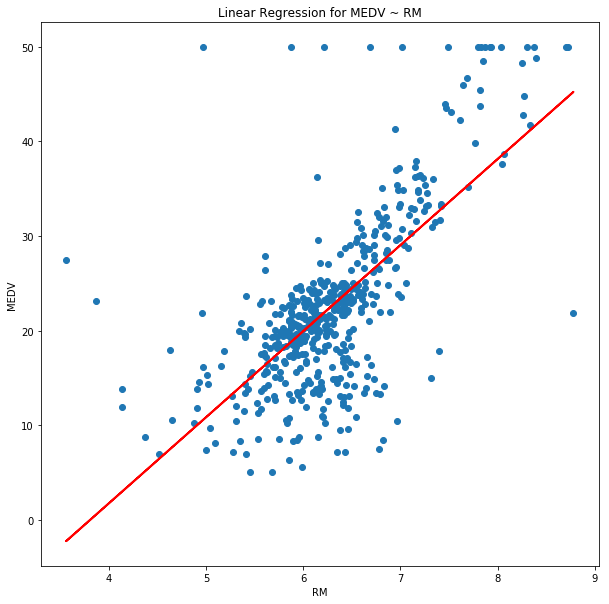

In [55]:
# Predict values
pred = model.predict()
# Plot regression against actual data
plt.figure(figsize=(10,10))
plt.plot(df['RM'], df['MEDV'], 'o')           # scatter plot showing actual data
plt.plot(df['RM'], pred, 'r', linewidth=2)   # regression line
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.title('Linear Regression for MEDV ~ RM')
plt.show()

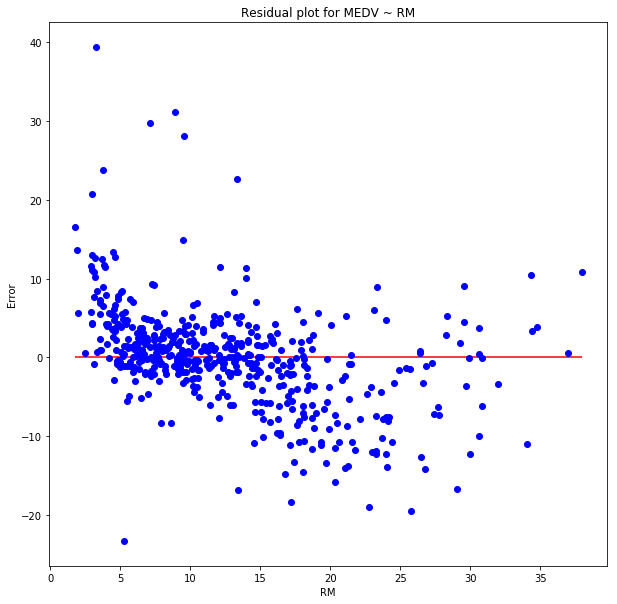

In [56]:
pred = np.array(pred)
Y = np.array(df['MEDV'])
X = np.array(df['LSTAT'])
error = Y - pred
plt.figure(figsize = (10,10))
plt.plot(X, error, 'bo')
plt.hlines(0, min(X), max(X), 'r')
plt.xlabel('RM')
plt.ylabel('Error')
plt.title('Residual plot for MEDV ~ RM')
plt.show()

In [57]:
model.params

Intercept   -34.670621
RM            9.102109
dtype: float64

In [58]:
model = smf.ols('MEDV ~ LSTAT + RM + C(CHAS)', data=df)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     312.7
Date:                Thu, 05 Mar 2020   Prob (F-statistic):          1.92e-114
Time:                        01:33:09   Log-Likelihood:                -1573.6
No. Observations:                 506   AIC:                             3155.
Df Residuals:                     502   BIC:                             3172.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.7637      3.122     -0.245      0.807      -6.898       5.370
C(CHAS)[T.1]     4.1205      0.958      4.300      0.000       2.238       6.003
LSTAT           -0.6428      0.043    -14.953      0.000      -0.727      -0.558
RM               4.9558      0.438     11.311      0.000       4.095       5.817
==============================================================================
Omnibus:                      133.400   Durbin-Watson:                   0.930
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              414.658
Skew:                           1.229   Prob(JB):                     9.08e-91
Kurtosis:                       6.691   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
model.params

Intercept      -0.763680
C(CHAS)[T.1]    4.120479
LSTAT          -0.642848
RM              4.955812
dtype: float64

##### Model refinement

In [78]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [79]:
features = ['LSTAT', 'RM']
X = df[features]
Y = df['MEDV']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state = 1)
print(x_test.shape[0])
print(x_train.shape[0])

76
430


In [80]:
from sklearn.linear_model import Ridge

In [81]:
RidgeMode = Ridge(alpha = 0.1)
RidgeMode.fit(X, Y)
RidgeMode.score(X, Y)

0.6385615677907783

In [82]:
pr = PolynomialFeatures(degree = 2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeMode1 = Ridge(alpha = 0.1)
RidgeMode1.fit(x_train_pr, y_train)
RidgeMode1.score(x_test_pr, y_test)

0.8245868315647508

In [83]:
RidgeMode1.coef_

array([ 0.00000000e+00,  4.02439433e-01, -1.43445356e+01,  8.97843996e-03,
       -2.37246401e-01,  1.64216892e+00])

In [84]:
RidgeMode1.intercept_

58.261660621518374